# Individual Project Planning

### 1. Data Description

**Players Data Set**: The players.csv data set describes data regarding individual players of the game. It has 196 observations that each have 7 variables including: 
- **experience**: Describes the players experience with the game as either "Pro", "Veteran", "Regular", or "Amateur".
- **subscribe**: Displays "TRUE" if the player is subscribed to the newsletter, and "FALSE" if they are not.
- **hashedEmail**: The hashed email (privacy safe way of displaying email) of the player. 
- **played_hours**: Amount of time (hours) player played during all sessions.
- **name**: Players first name
- **gender**: Players gender as Female, Male, Agender, Two Spirited, Non-Binary, or Perfer not to say. 
- **Age** Players age in years

**Summary Statistics**
|Variable |Min | Max | Mean  | Q1 | Q2 | Q3 |
|---------|----|-----|------|-----|----|----|
|played_hours (hrs)|0.00|223.10|5.85|0.00|0.10|0.60|
|Age (years)|9.00|58.00|21.14|17.00|19.00|22.75|

**Sessions Data Set**: The sessions.csv data set describes data regarding individual players of th game. It has 1535 observations that each have 5 variables including:
- **hashedEmail**: The hashed email (privacy safe way of displaying email) of the player.
- **start_time**: The date in the format DD/MM/YYYY, and the time in military time the player began their playing session
- **end_time**: The date in the format DD/MM/YYYY, and the time in military time the player ended their playing session
- **original_start_time**: Start time of players session in milliseconds
- **original_end_time**: End time of players session in milliseconds

**Summary Statistics**
|Variable |Min | Max | Mean  | Q1 | Q2 | Q3 |
|---------|----|-----|------|-----|----|----|
|origional_start_time (milliseconds)|1.71e+12|1.73e+12|1.72e+12|1.72e+12|1.72e+12|1.72e+12|
|origional_end_time (milliseconds)|1.71e+12|1.73e+12|1.72e+12|1.72e+12|1.72e+12|1.72e+12|

**Data Collection**

A computer science research group at UBC created a MineCraft server that collected data by recording each players information, actions of their session, and duration of their session.

**Potential Data Issues**
- Some observations in that data set contain missing data (NA's)
- Some observations in the players.csv data set had a total playing time (played_hours) of zero, meaning the player signed up to play put never actually spent anytime playing. 

### 2. Questions
**Broad Question**: The broad question I want to adress with this project is **What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types??** 

**Specific Question**: The specific question I want to adress with this project is **Can Age, gender, and played_hours predict if the player is subscribed to the newsletter (subscribe) in the players.csv data set and how does this differ between experience levels?** 

### 3. Exploratory Data Analysis and Visualization

**Loading in and tidying the players.csv data set:**

In [2]:
library(tidyverse)
players_data <- read_csv("https://raw.githubusercontent.com/emilyk-05/individual_project_planning/refs/heads/main/players.csv")
head(players_data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Each row in the players.csv data set contains on observation and each cell contains one value. The header names describe the coloumns and they are the correct data type. This data set is tidy and needs no wrangling at this point in the project. 

**Players Data Set Summary Statistics:**

In [3]:
summary(players_data)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

**Mean Values of Quantitative Variables in Players Data Set:**

|Quantitative Variable |Mean Value | Units |
|----------------------|-----------|-------|
|played_hours          |  5.846   | hours |
|age                   | 21.139   | years |

**Loading in and tidying the sessions.csv data set:**

In [4]:
sessions_data <- read_csv("https://raw.githubusercontent.com/emilyk-05/individual_project_planning/refs/heads/main/sessions.csv")
head(sessions_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [5]:
sessions_data_separate <- separate(sessions_data,
    col = start_time, 
    into = c("start_date", "start_time"), 
    sep = " ") |>
separate(
    col = end_time, 
    into = c("end_date", "end_time"),
    sep = " ")
head(sessions_data_separate)

hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1.71916e+12,1.71916e+12


**Sessions Data Set Summary Statistics:**

In [6]:
summary(sessions_data)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

**Visualizations**

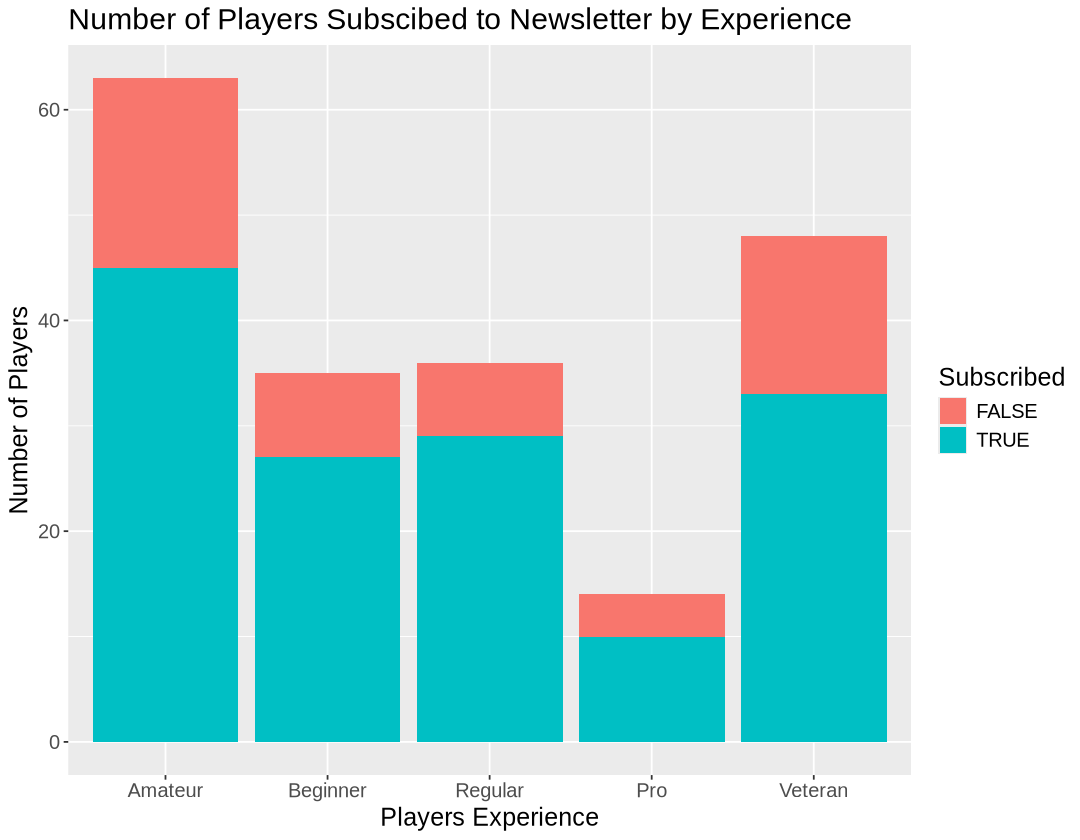

In [7]:
options(repr.plot.height = 7, repr.plot.width = 9)
players_gender <- players_data |>
    ggplot(aes(x = factor(experience,levels = c("Amateur", "Beginner", "Regular", "Pro", "Veteran")) , fill = subscribe)) +
    geom_bar() +
    xlab("Players Experience") +
    ylab("Number of Players") +
    ggtitle("Number of Players Subscibed to Newsletter by Experience") +
    labs(fill = "Subscribed") +
    theme(text = element_text(size = 15))
players_gender

From the bar graph "Number of Players Subscribed to Newsletter by Experience" we can see that within each player experience category there are more players subscribed than not and it is fairly proportionate between each experience level. We can also see there is a higher number of amateur players, less beginner and regular players, the lowest amout of pro players, and the second highest amount of players are veterans. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


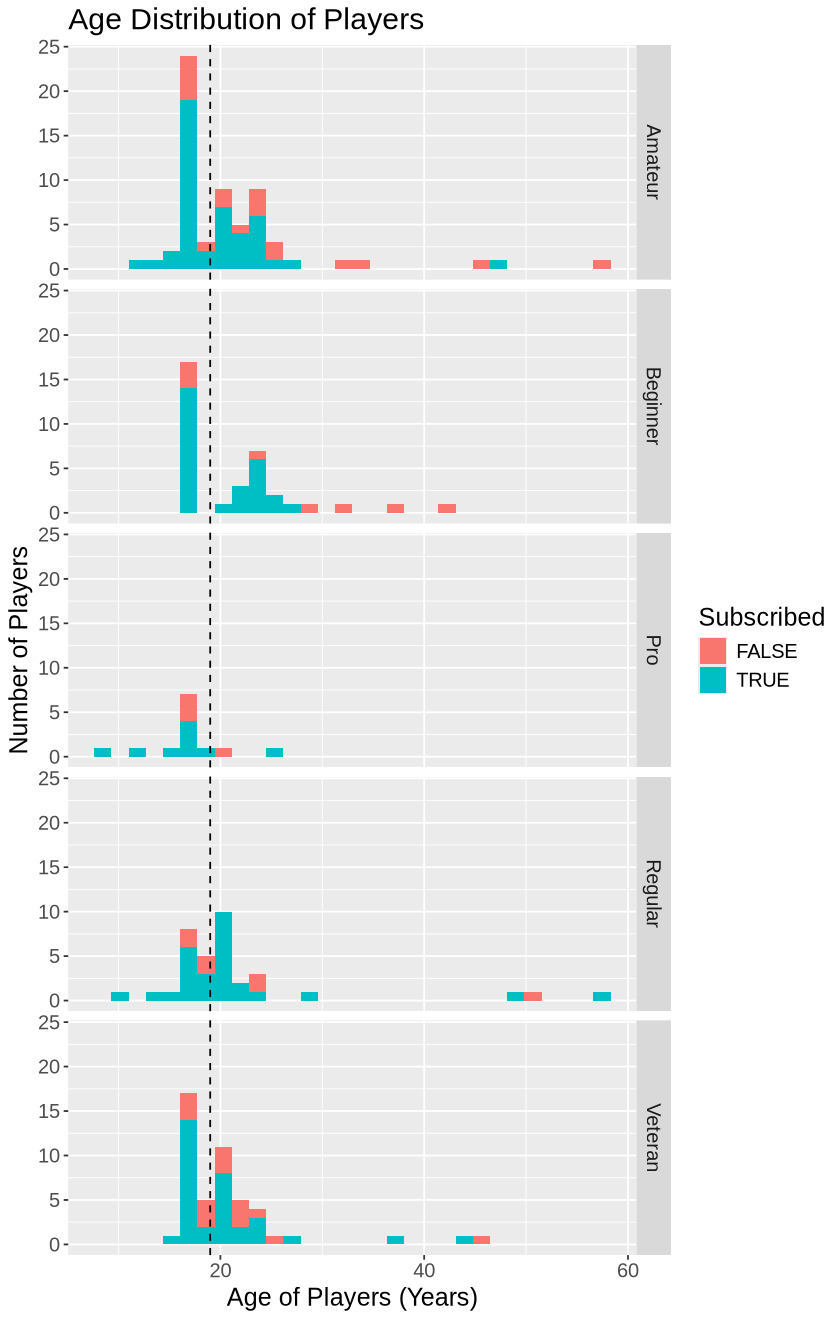

In [8]:
options(repr.plot.height = 11, repr.plot.width = 7)
age_distribution <- players_data |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram() +
    facet_grid(rows = vars(experience)) +
    xlab("Age of Players (Years)") +
    ylab("Number of Players") +
    ggtitle("Age Distribution of Players") +
    labs(fill = "Subscribed") +
    geom_vline(xintercept = 19, linetype = "dashed") +
    theme(text = element_text(size = 15))
age_distribution 

From the histogram "Number of Players by Gender" we can see that despite the experiance level of the player, most players ages seem to be centered around approximatly 20 years. Each histogram seems to show a right skewed distribution (except pro level players) showing more of the players are younger and have a center and spread best represented by the median and IQR. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


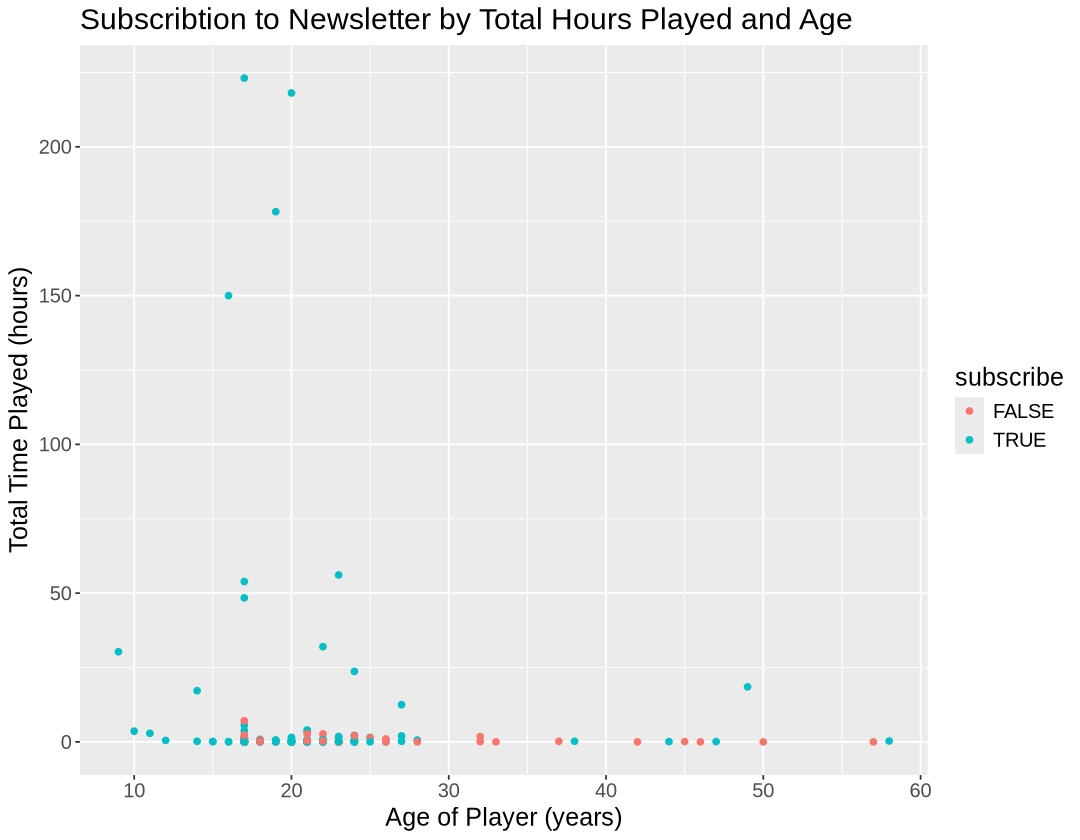

In [9]:
options(repr.plot.height = 7, repr.plot.width = 9)
hours_age_plot <- players_data |>
    ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point() +
    xlab("Age of Player (years)") +
    ylab("Total Time Played (hours)") +
    ggtitle("Subscribtion to Newsletter by Total Hours Played and Age") +
    theme(text = element_text(size = 15))
hours_age_plot

From the scatter plot "Subscribtion to Newsletter by Total Hours Played and Age" we can see there is a lot of players with low playing times that show no apparent relationship to determine if they are subscribed or not. We can see that younger players have more extreme high values of playing time and that these players with high playing times are subscribed to the newsletter. 

### 4. Methods and Plan

**Model Type**

To predict if a player is subscribed based of the players age, gender, and played hours, the model used will be K nearest neighbor classification. This model is appropriate because the varable being predicted, subscibe, is a categorical variable. Classification is used to predict categorical variables and regression is used to predict numerical variable, which would make it not appropriate for this problem. No assumptions about the shape of the relationship is needed to use K nearest neighbor classification. Some possible weaknesses of the K nearest neighbors classification model for this problem are the models sensitivity to the k-value. This means it will be important to analyze the performance of the classifier to determine to best k value. There is also a large difference in between the predictors (e.x. 200 hours is much larger than 15 years) that could cause the prediction to be incorrect. To prevent this, the predictors will be centered and scaled. 

**Process**
To evaluate the performace of the classifier, the data will be split into a testing and training set to ensure it can predict observations it wasn't trained on. Inital split will be used with the strata "subscribe" so that an equal preportion of this categorical variable is in both data sets. The players.csv is a small dataset (196 rows) so the proportion of the training set will be 75% and the testing set will be 25% so that it is ensured the clasifer has enough data to train on. Cross validation will be done on the training set with the number of folds (v) equal to 5 and the same strata as before (subscribe). This will be used to calculate the accuracy of reasonable k-values to determine which k value will have the most accuracy for this problem. 


### 5. Git Hub Repository 

https://github.com/emilyk-05/individual_project_planning.git 